# Predicting Song Performance on Music Platforms 

__Introduction__
- This project aims to segment certain types of music consumers into different music platforms. 
- It will do this by analyzing the question of whether a song will proportionally do better on Spotify or Youtube based on the traits associated with the song. Traits include both objective and subjective statistics such as duration of the song vs danceability of the song. 

__Approaches Used__
- Processing and Cleaning the Dataset
- Creating Data Visualizations 
- Building and Applying Machine Laerning Models 
- Analysis of Results

__Sources__
- Dataset: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube
- Dataset consists of songs from various artists in the world and for each song the following is present:
    - Several statistics of the music version on Spotify, including the number of streams;
    - Several statistics of the official music video on  Youtube, including the number of views;

In [520]:
# Importing Packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
simplefilter(action='ignore')
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [521]:
# Loading in Database  

df = pd.read_csv("Spotify_Youtube.csv")

## Dataset Information

There are 26 columns/variables for each of the songs in the dataset. These columns are described and listed below.

- Track: name of the song, as visible on the Spotify platform.
- Artist: name of the artist.
- Url_spotify: the Url of the artist.
- Album: the album in wich the song is contained on Spotify.
- Album_type: indicates if the song is relesead on Spotify as a single or contained in an album.
- Uri: a spotify link used to find the song through the API.
- Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Key: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Duration_ms: the duration of the track in milliseconds.
- Stream: number of streams of the song on Spotify.
- Url_youtube: url of the video linked to the song on Youtube, if it have any.
- Title: title of the videoclip on youtube.
- Channel: name of the channel that have published the video.
- Views: number of views.
- Likes: number of likes.
- Comments: number of comments.
- Description: description of the video on Youtube.
- Licensed: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- official_video: boolean value that indicates if the video found is the official video of the song.

Here is a sample of what the data points in the dataset look like, the first five rows. Each row represents a song, and each column is a variable statistic about that song. 

In [522]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


We can use summary statistic functions to get an overall overview of how  the data is formatted. 

In [523]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


From these functions we can see we can see that the dataset has both numerical data in the form of the datatype "float64", and non-numerical data containing text in the form of the datatype "object". 

The range of values within the dataset is also varied, varying between negative values and positives values up to the 9th power.

# Data Processing and Cleaning

The dataset consists of many columns which are not significant or relevant to the queston at hand and can be removed

In [524]:
# Storing new dataset with non-significant columns dropped 
df_rel = df.drop(['Url_spotify', 'Uri', 'Album', 'Url_youtube', 'Description', 'Title', 
                  'Channel','Unnamed: 0'], axis=1)


Dealing with missing data:
- Remove NaN values by removing all of the samples 
- Reasoning: The dataset is filled with enough valid samples (that to do not have any missing data) for this method to be utilized

In [525]:
print(df_rel.isnull().sum().sort_values(ascending=False))

# If any of the rows in df_relevant are empty, delete that row 
df_rel = df_rel.dropna()
# Resetting the indexes 
df_rel = df_rel.reset_index(drop=True)

Stream              576
Comments            569
Likes               541
official_video      470
Licensed            470
Views               470
Valence               2
Duration_ms           2
Tempo                 2
Liveness              2
Instrumentalness      2
Acousticness          2
Speechiness           2
Loudness              2
Key                   2
Energy                2
Danceability          2
Track                 0
Album_type            0
Artist                0
dtype: int64


Encoding the data from cateogrical data to numerical data to be used by visualizations and models 
- Changing Album_type, which is either album or single, into binary data that classifies whether it is an album or not
- Setting True and False Variables into their numerical equivalents (1's and 0's) 


In [526]:
for i in range(len(df_rel)):
    isAlbum = df_rel['Album_type'][i] == 'album'
    df_rel['Album_type'][i] = int(isAlbum)    

In [527]:
df_rel['Licensed'] = df_rel['Licensed'].astype(int)
df_rel['official_video'] = df_rel['official_video'].astype(int)

The dataset doesnt't have a definitive target variable that would allow us to compare platform performance. However we can use data engineering to create a binary target variable, representing if a song did better on Youtube (represented by value 1) or Spotify (represetned by value 0). 

Each songs views and streams are divided by their respective platform average, this standardizes each songs performance based on the populairty of the platform.

These two scores are compared to create a new variable, called platform perofrmance which is the binary target variable.

In [528]:
# Averages of View (Youtube) and Stream (Spotify) columns in dataset 
yt_views_avg = df_rel["Views"].mean()
spotify_streams_avg = df_rel["Stream"].mean()
print("Average Number of Views across all songs in dataset: ", yt_views_avg)
print("Average Number of Streams across all songs in dataset: ", spotify_streams_avg)

Average Number of Views across all songs in dataset:  95456263.74060054
Average Number of Streams across all songs in dataset:  137110145.14113253


In [529]:
# New score columns made based on songs performance compared to average on platform 
df_rel['View Score'] = df_rel['Views'] / yt_views_avg
df_rel['Stream Score'] = df_rel['Stream'] / spotify_streams_avg
# List Consiting of each data point where the view score is higher than the stream score 
size_list = df_rel.loc[df_rel['View Score']> df_rel['Stream Score']]
print("Percentage of the dataset that has a higher Youtube view score than Spotify stream score:", ((len(size_list) / len(df_rel)) * 100)) 
df_rel['Platform Performance'] = -1
# Creating new Platform Performance column through iteration, (1 - Youtube Score better) (0 - Spotify Score Better)
for i in range(len(df_rel)):
    df_rel['Platform Performance'][i] = 1 if df_rel['View Score'][i] > df_rel['Stream Score'][i] else 0

Percentage of the dataset that has a higher Youtube view score than Spotify stream score: 30.625607447951303


# Visualizations

To get a relative sense of how the views variable, stream variable, and our newly created target variable map to the dataset, lets examine their comparisins using pie graphs.  

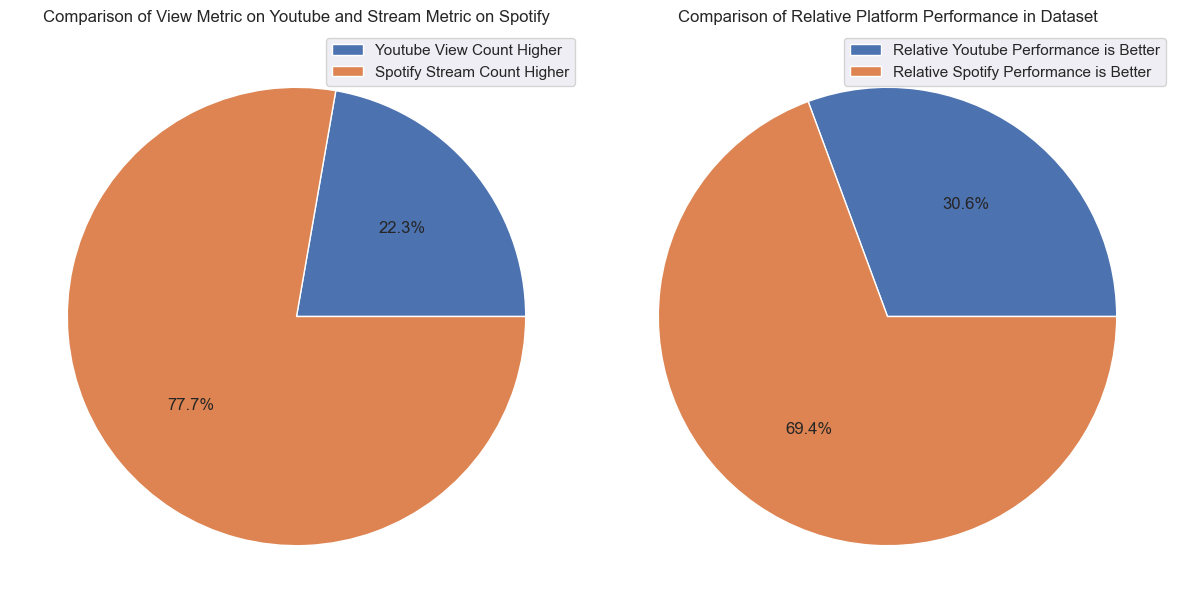

In [530]:
"""
Create 2 Pie graphs using matplotlib 
One graph comparing Youtube view count with Spotify stream Count - Another comparing view score with stream score 
"""

# Adjusts Size, Makes figure with 1 row and 2 columns for subplot 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,10))

yt_higher = df_rel['Views'] > df_rel['Stream']
spotify_higher = df_rel['Stream'] > df_rel['Views']
ax1.pie(x=[yt_higher.sum(), spotify_higher.sum()], autopct='%1.1f%%')
ax1.legend(['Youtube View Count Higher', 'Spotify Stream Count Higher'])
ax1.set_title('Comparison of View Metric on Youtube and Stream Metric on Spotify')


youtube_condition = df_rel['Platform Performance'] == 1
spotify_condition = df_rel['Platform Performance'] == 0
ax2.pie(x=[youtube_condition.sum(), spotify_condition.sum()], autopct='%1.1f%%')
ax2.legend(['Relative Youtube Performance is Better', 'Relative Spotify Performance is Better'])
ax2.set_title('Comparison of Relative Platform Performance in Dataset')

plt.tight_layout()
plt.show()

It is observed that creating a target variable was useful as Spotify streams are generally higher than youtube views for songs (77.7% vs 22.3%), most likely because the platform is more popular for music. The second pie chart comparing platform performance shows how this differential was slighly changed in favor of youtube (69.4% vs 30.6%)

<br>




Now we examine the collinearity of the datasets features with the target variable, aswell as the collinearity of any two features in the dataset. The following heatmap correlation represents the correlation coefficients between each pair of variables.

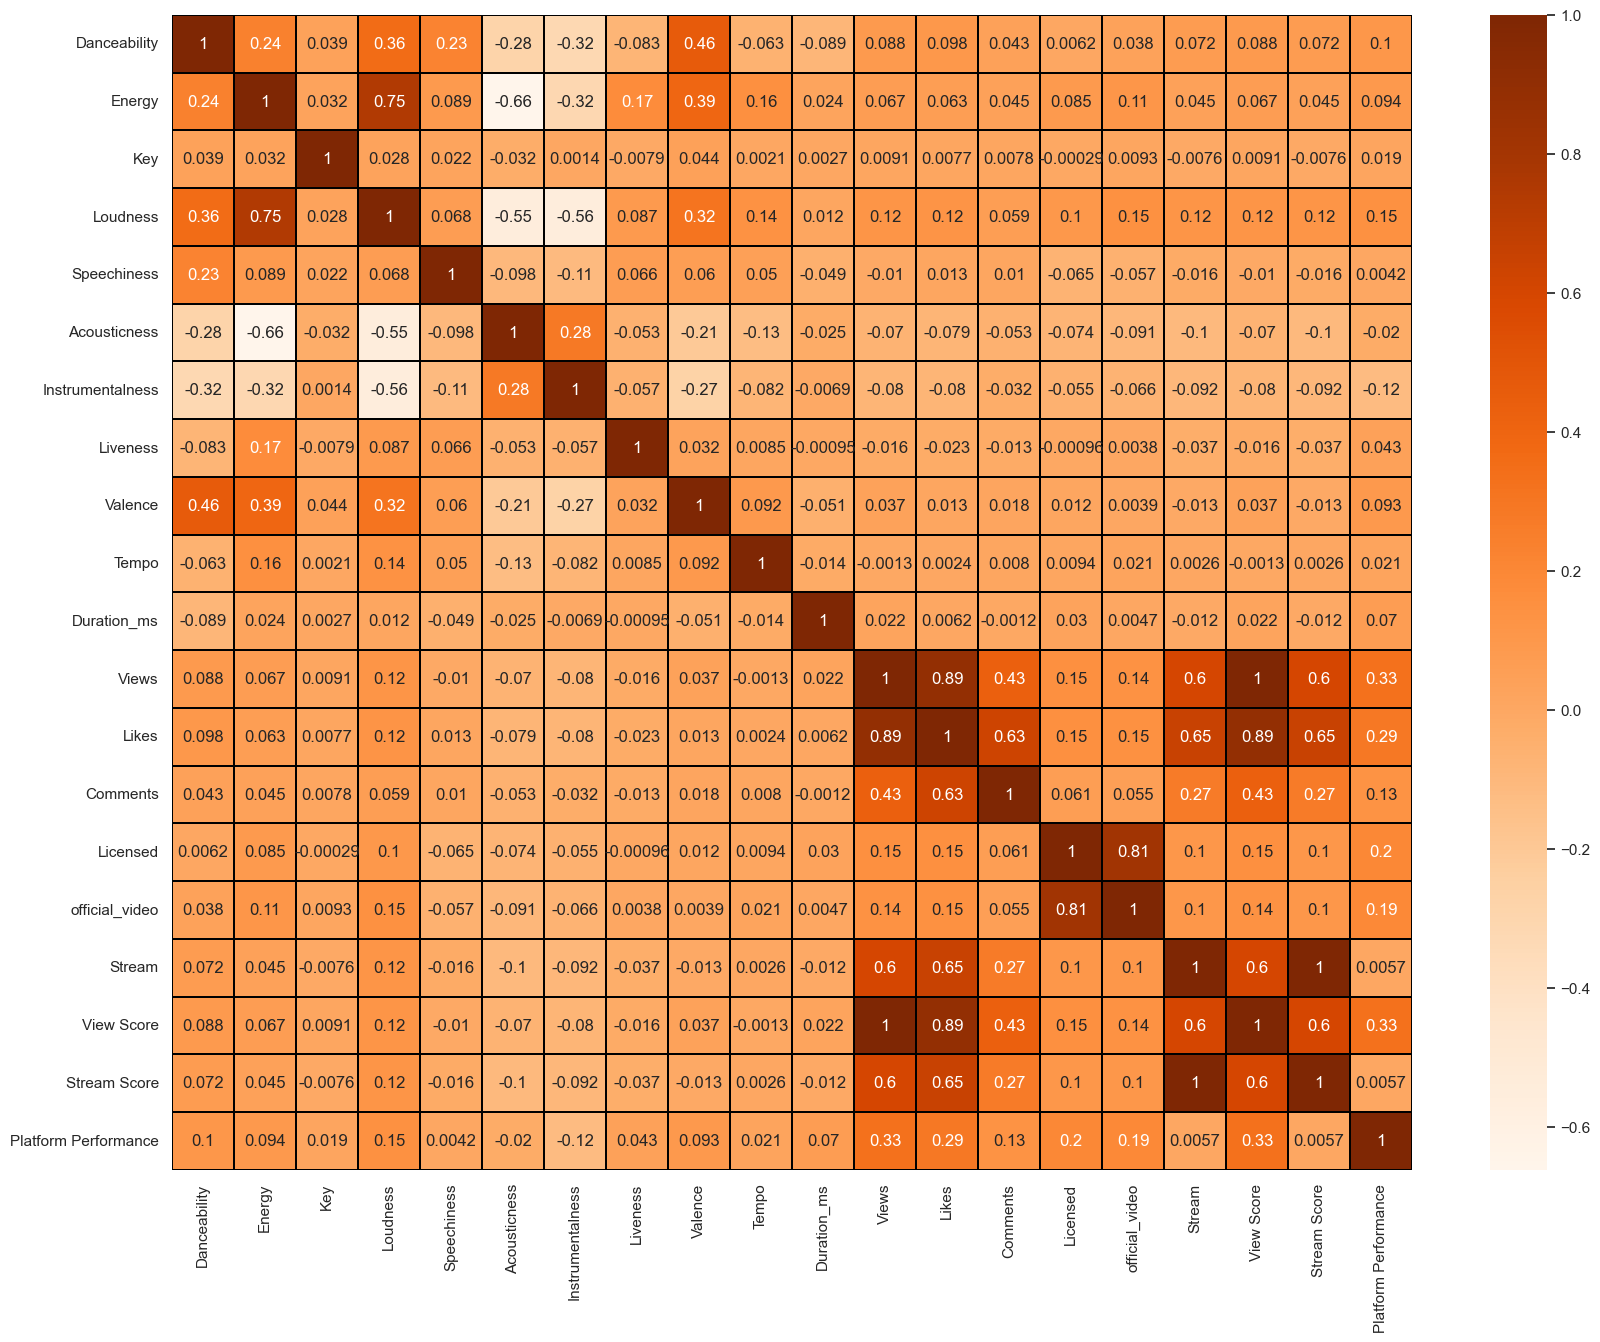

In [531]:
# Artist, Track, and Album_type variables dropped as they are not relevant to correlation heatmap  
corr = df_rel.drop(['Artist','Track','Album_type'], axis=1).corr()
sns.set(rc = {'figure.figsize':(20,15)})
# Heatmap created using seaborn, visuals adjusted for readability 
sns.heatmap(corr, annot=True, cmap='Oranges',linecolor='black',linewidths=0.1)

plt.show()

It is observed from the heatmap that these variables have the highest correlation to the Platform Performance target variable: 
- Danceability, Loudness, Acousticness, Instrumentalness, Valence, and Duration_ms 

Some of the features also a high colinearity, suggesting the fact that only one of the two features need to be used:
- Example: Loudness and Energy 
 
<br>

In [532]:
"""
Creating a list of all the variables in the correaltion matrix that have an absolute value correlation > 0.25
to platform performance
""" 
corr_feature = corr.index[abs(corr['Platform Performance']) >= 0.25]
corr_feature

Index(['Views', 'Likes', 'View Score', 'Platform Performance'], dtype='object')

The fact that none of the musical traits have above a 0.25 correlation to platform performance shows us there are no explicit/obvious correaltions between a songs traits and its performance on the different music platforms

<br>

The artists with most amount of views on Youtube and the amount streams on Spotify have a high probability of representing the general trends of consumers that flock towards those platforms. Lets analyze these trends with bar graphs.

In [533]:
"""
Each line of code first groups the dataset by the artist column. Then for each artist group songs, 
the mean is calculated for the views/streams columns and one of the songs traits columns (resulting in average
views and traits for each artist). The dataframe is then sorted in descending order based on the views/stream 
column, meaning the artists with the highest total views/streams are listed first. 

In summary, these liens of code find the top 5 artists in the datasets with the most views on Youtbe and most 
Streams on spotify across their songs, along with their average scores for a certain song trait.
"""
dance_view = df_rel.groupby(['Artist'])[['Views','Danceability']].mean().reset_index().sort_values(by='Views',ascending=False).head(5)
dance_stream = df_rel.groupby(['Artist'])[['Stream','Danceability']].mean().reset_index().sort_values(by='Stream',ascending=False).head(5)

loud_view = df_rel.groupby(['Artist'])[['Views','Loudness']].mean().reset_index().sort_values(by='Views',ascending=False).head(5)
loud_stream = df_rel.groupby(['Artist'])[['Stream','Loudness']].mean().reset_index().sort_values(by='Stream',ascending=False).head(5)

acoust_view = df_rel.groupby(['Artist'])[['Views','Acousticness']].mean().reset_index().sort_values(by='Views',ascending=False).head(5)
acoust_stream = df_rel.groupby(['Artist'])[['Stream','Acousticness']].mean().reset_index().sort_values(by='Stream',ascending=False).head(5)

inst_view = df_rel.groupby(['Artist'])[['Views','Instrumentalness']].mean().reset_index().sort_values(by='Views',ascending=False).head(5)
inst_stream = df_rel.groupby(['Artist'])[['Stream','Instrumentalness']].mean().reset_index().sort_values(by='Stream',ascending=False).head(5)

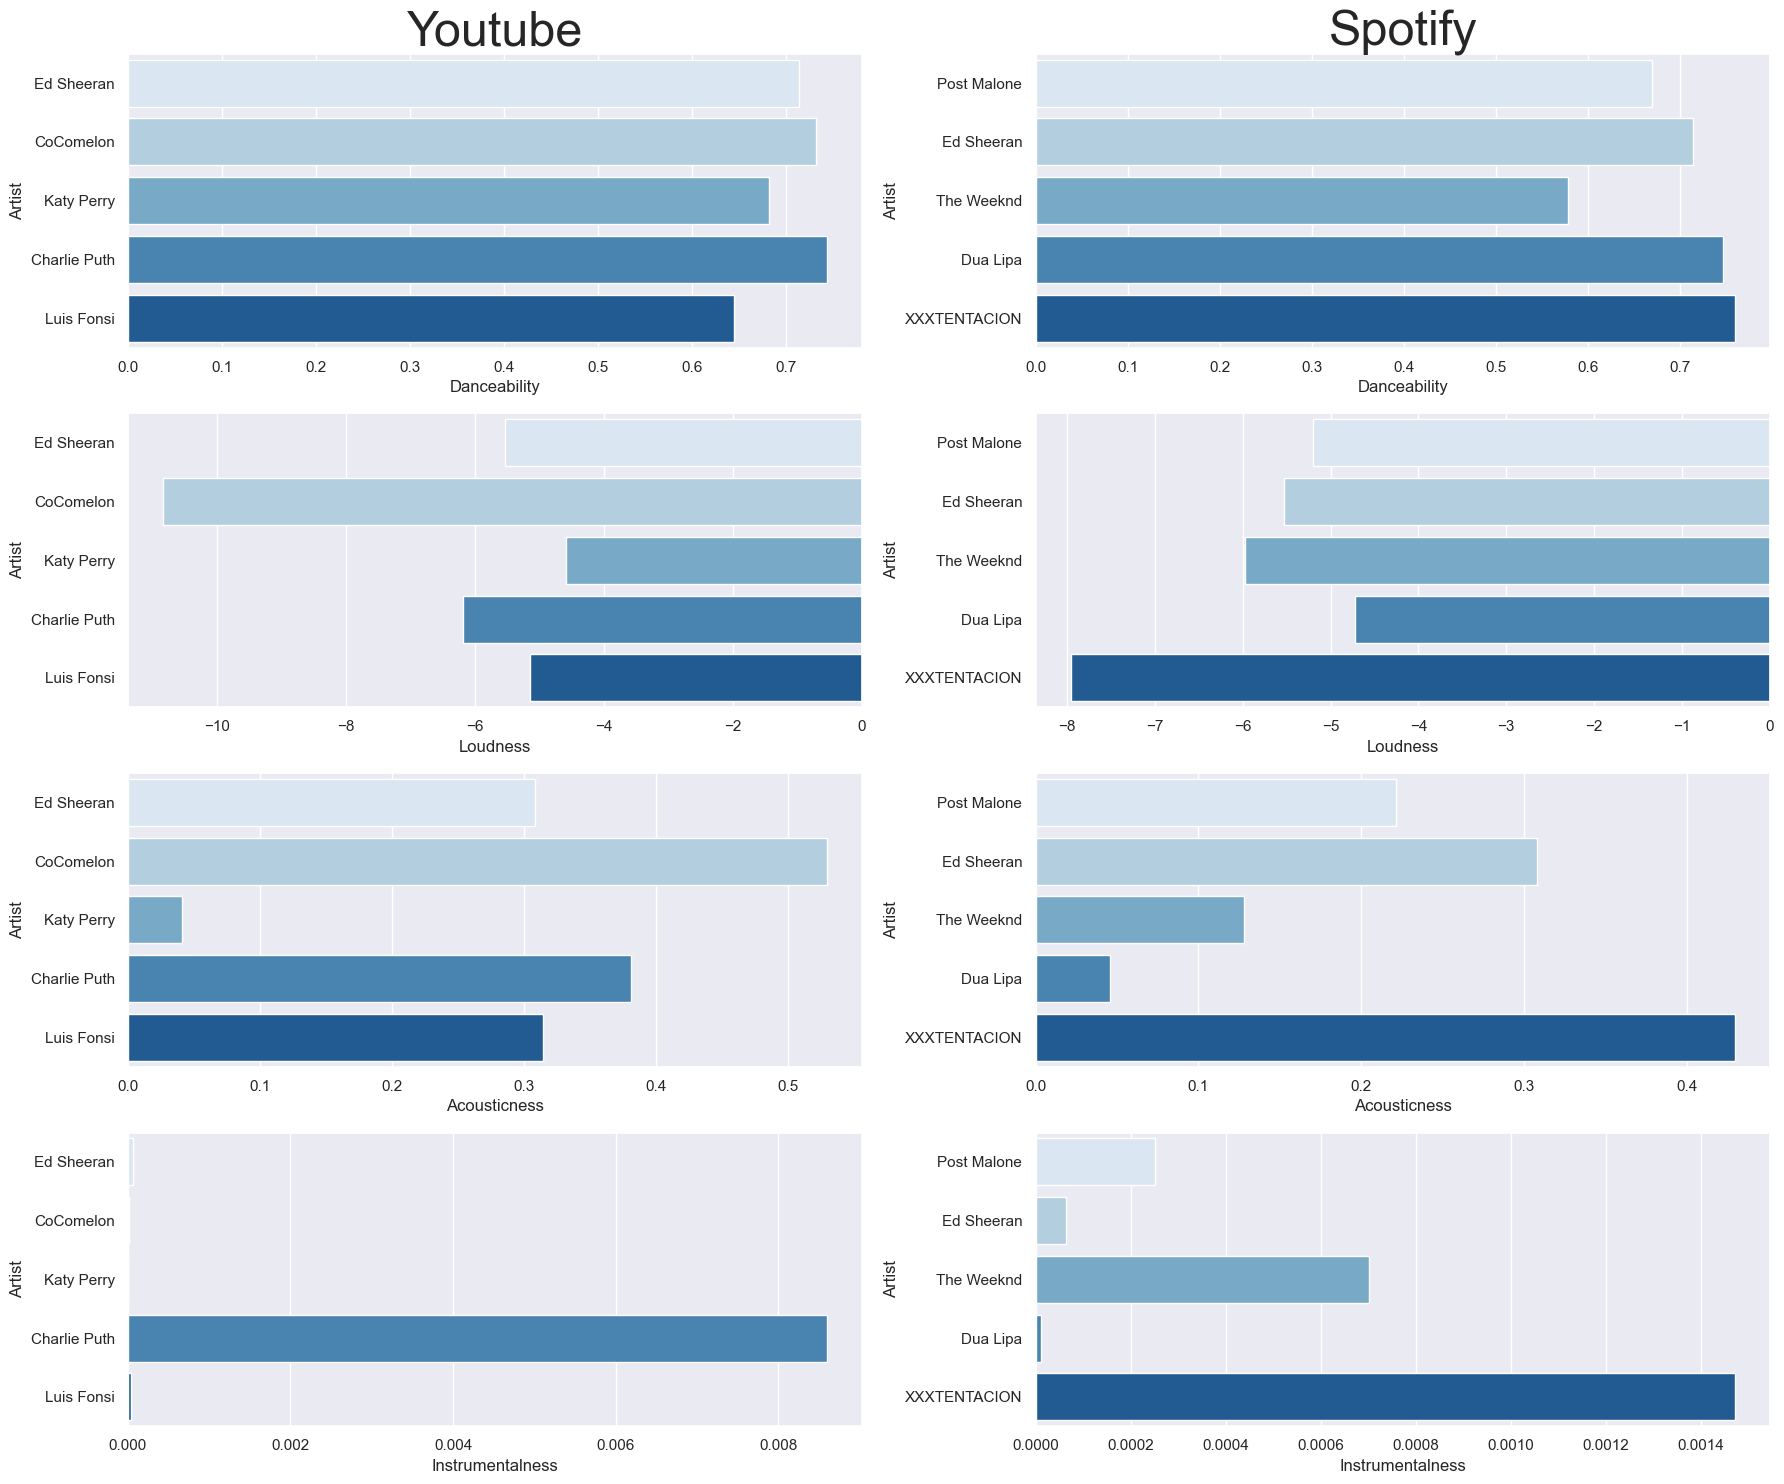

In [534]:
#Creating plots to represent the average trait values for the most viewed and streamed artists

# A figure is made with 4 rows and 2 columns
fig, axs = plt.subplots(4,2, figsize=(18,15))

#Plotting all the data from previous cell using seaborn 
sns.barplot(data=dance_view,y='Artist',x='Danceability',orient='h',palette='Blues', ax = axs[0,0])
sns.barplot(data=dance_stream,y='Artist',x='Danceability',orient='h',palette='Blues', ax = axs[0,1])
sns.barplot(data=loud_view,y='Artist',x='Loudness',orient='h',palette='Blues', ax = axs[1,0])
sns.barplot(data=loud_stream,y='Artist',x='Loudness',orient='h',palette='Blues', ax = axs[1,1])
sns.barplot(data=acoust_view,y='Artist',x='Acousticness',orient='h',palette='Blues', ax = axs[2,0])
sns.barplot(data=acoust_stream,y='Artist',x='Acousticness',orient='h',palette='Blues', ax = axs[2,1])
sns.barplot(data=inst_view,y='Artist',x='Instrumentalness',orient='h',palette='Blues', ax = axs[3,0])
sns.barplot(data=inst_stream,y='Artist',x='Instrumentalness',orient='h',palette='Blues', ax = axs[3,1])


axs[0][0].set_title('Youtube', fontsize = 35)
axs[0][1].set_title('Spotify', fontsize = 35)

# Function to adjust layout nicely
fig.tight_layout()

plt.show()

From these summary statistics of the most popular artists we can observe that some variables such as Danceability 
and Loudness have realtively low variance while other vairables such as Acousticness and Instrumentalness have higher Variance.

# Machine Learning Models

To start using machine learning models to make predictions and answer our question, we must first split the data into the training sets used to learn the relationships and testing sets to validate the model.

In [535]:
# Features and Target variables segmented from the dataset 
features = df_rel[['Danceability','Loudness','Acousticness','Instrumentalness','Valence','Duration_ms']]
target = df_rel['Platform Performance']

# Train-Test Split of the data, with 20% of the data used for tesitng
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Logistic Regression Model used to fit a linear realtionship between the variables and produce an outocme based on binary classification.

In [536]:
# Creating and fitting a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

# Making productions from our train-test split 
log_pred_train = logreg.predict(X_train)
log_pred_test = logreg.predict(X_test)

print("Train Accuracy", accuracy_score(Y_train, log_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, log_pred_test))

Train Accuracy 0.6945456870643903
Test Accuracy:  0.6859335038363171


The Logisitc Regression model's accuracy is decent, being around 70%, but there is definetely room for improvement.

<br>

Let's try scaling the dataset to center the data around 0 and  see if that can improve the accuracy.

In [537]:
#Using Standard Scalar to scale the data and save the resultign dataframe in an ew vairbale
scaler = StandardScaler().fit(features)
standard_scaled_data = scaler.transform(features)
standard_scaled_data = pd.DataFrame(standard_scaled_data,columns=['Danceability','Loudness','Acousticness','Instrumentalness','Valence','Duration_ms'])

# New Train-Test Split on Scaled Data
X_train_s,X_test_s,Y_train_s,Y_test_s = train_test_split(standard_scaled_data,target,test_size=0.2,random_state=42)

logreg.fit(X_train_s,Y_train_s)
pred_test_s = logreg.predict(X_test_s)

print("Test Accuracy: ", accuracy_score(Y_test, pred_test_s))

Test Accuracy:  0.689002557544757


The test accuracy very slighly improved by scaling the data, but a signficant difference was not made. 

<br>

K-Nearest Neighbor classifier model used to cluster datapoints based on distance similarity and then predict unknown data 

In [538]:

"""
Finding the best k hyper parameter by iterating through different valeus of k and keeping track of model that
produceds the highest accuracy

"""
best_k = 1
best_k_accuracy = 0 
for k in range (1,20): 
    # Creating, fitting a k-nn model
    knn_model = KNeighborsClassifier(k)
    knn_model.fit(X_train,Y_train) 
    # Testing the accuracy of the models predictions 
    k_pred_test = knn_model.predict(X_test)
    acc_test = accuracy_score(Y_test, k_pred_test)
    # Compating current accuracy to best accuracy
    if acc_test > best_k_accuracy:
        best_k = k
        best_k_accuracy = acc_test
    
print("Best k hyperparamter:", best_k)
print("Best accuracy found: ", best_k_accuracy)

Best k hyperparamter: 2
Best accuracy found:  0.6854219948849105


The accuracy of the k-nn model is very similar to the the logistic regression model

<br>

Decision Tree Classifier Model used to predict the target by learning deicison rules from features

In [539]:
"""
Finding the best depth hyper parameter by iterating through different valeus of max_depth and keeping track of 
tree that produceds the highest accuracy

"""
best_depth = 1      
best_tree_accuracy = 0   
for d in range(1, 20):
    # Creating, fitting a decision tree model
    tree_model = DecisionTreeClassifier(max_depth=d)
    tree_model.fit(X_train,Y_train)
    # Testing the accuracy of the models predictions 
    tree_pred_test = tree_model.predict(X_test)
    acc_test = accuracy_score(Y_test, tree_pred_test)
    # Compating current accuracy to best accuracy
    if acc_test > best_tree_accuracy:
        best_depth = d
        best_tree_accuracy = acc_test

print("Best depth hyperparamater:", best_depth)
print("Best accuracy found:", best_accuracy)


Best depth hyperparamater: 8
Best accuracy found: 0.6869565217391305


The accuracy of the decision tree model is also very similar to the logistic regression model and the k-nn model. Overall this expresses that the model does not have much impact on the accuracy of classifying platofrm performance.  

<br>

Let's try using all the musical trait features to see if that has any influence on the accuracy of our models.

In [540]:
# Creating new features list with more features
more_features = df_rel[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms']]

X_train, X_test, Y_train, Y_test = train_test_split(more_features, target, test_size=0.2, random_state=42)


# Retesting the three models 
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
log_pred_train = logreg.predict(X_train)
log_pred_test = logreg.predict(X_test)
acc_test = accuracy_score(Y_test, pred_test_s)
print("Logistic Regression Accuracy:", acc_test)

knn_model = KNeighborsClassifier(best_k)
knn_model.fit(X_train,Y_train) 
k_pred_test = knn_model.predict(X_test)
acc_test = accuracy_score(Y_test, k_pred_test)
print("K-NN Classifier Accuracy:", acc_test)

tree_model = DecisionTreeClassifier(max_depth=best_depth)
tree_model.fit(X_train,Y_train)
tree_pred_test = tree_model.predict(X_test)
acc_test = accuracy_score(Y_test, tree_pred_test)
print("Tree Decision Classifier Accuracy:",acc_test)

Logistic Regression Accuracy: 0.689002557544757
K-NN Classifier Accuracy: 0.681074168797954
Tree Decision Classifier Accuracy: 0.6974424552429668


Adding these new features did not change the accuracy of the models much with logistic regression and decision tree models becoming slighly more accurate, and the k-nn model becoming slighly more innacurate.

<br>

Let's look into a confusion matrix to see if we can understand more about the limiting performance being produced from our models. Since the Decision Tree classifier has produced the best accuracy so far, the next cells will use this model. K-fold Cross validation will now be a resmapling technique used to more broadly assess the performance of the models.

In [541]:
accuracies, positive_predictive_values, negative_predictive_values = [],[],[]
"""
Creating 10 equally sized paritions of training data and using K-fold Cross vlaidation 
to get the validaiton error
""" 
n_folds = 10
kf = KFold(n_folds)
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    Y_train, Y_test = target[train_index], target[test_index]
    tree_model = DecisionTreeClassifier(max_depth=best_depth)
    tree_model.fit(X_train, Y_train)
    tree_pred = tree_model.predict(X_test)
    
    #true negative, false positive, false negative, true positive derived from confusion matrix function
    tn, fp, fn, tp = confusion_matrix(Y_test, tree_pred, labels=[False,True]).ravel()
    
    accuracies.append((tn + tp) / len(Y_test))
    # Sensitivity: Tells us how many positives are correctly identified as positives
    if tp + fn > 0:
        positive_predictive_values.append(tp / (tp + fn))
    # Specificity: Tells us how many negatives are correctly identified as negatives
    if tn + fp > 0:
        negative_predictive_values.append(tn / (tn + fp))
    
#Getting the mean of all these values to assess the summary of our accuracies
tree_accuracy = np.mean(accuracies)
tree_positive_predictive_value = np.mean(positive_predictive_values)
tree_negative_predictive_value = np.mean(negative_predictive_values)

print("Accuracy:", cv_accuracy)
print("Accuracy for positive samples",  tree_positive_predictive_value)
print("Accuracy for negative samples", tree_negative_predictive_value)

# Clearly Model is not predicting the positive samples very well, but increasing the number of features makes 
# the positive sample rate a little bit better 


Accuracy: 0.6926183028059695
Accuracy for positive samples 0.25826130791965946
Accuracy for negative samples 0.8879385107241241


The confusion matrix highlights that the accuracy for predicting positive samples is the major problem with the models. This is to be somewhat expected as there are more negative samples (where Spotify has better relative performance) than positive samples (where Youtube has better relative performance) in the dataset.

<br>

Let's try using this same technique but adding more features to see if this has any effect on the confusion matrix 

In [542]:
# Code is the same as the previous cell but using more features instead

accuracies, positive_predictive_values, negative_predictive_values = [],[],[]
n_folds = 10
kf = KFold(n_folds)
for train_index, test_index in kf.split(more_features):
    X_train, X_test = more_features.iloc[train_index], more_features.iloc[test_index]
    Y_train, Y_test = target[train_index], target[test_index]
    tree_model = DecisionTreeClassifier(max_depth=best_depth)
    tree_model.fit(X_train, Y_train)
    tree_pred = tree_model.predict(X_test)
    
    #true negative, false positive, false negative, true positive (Model Prediction, False or True is if that was acutally right)
    tn, fp, fn, tp = confusion_matrix(Y_test, tree_pred, labels=[False,True]).ravel()
    
    accuracies.append((tn + tp) / len(Y_test))
    # Sensitivity: Tells us how many positives are correctly identified as positives
    if tp + fn > 0:
        positive_predictive_values.append(tp / (tp + fn))
    # Specificity: Tells us how many negatives are correctly identified as negatives
    if tn + fp > 0:
        negative_predictive_values.append(tn / (tn + fp))
    
tree_accuracy = np.mean(accuracies)
tree_positive_predictive_value = np.mean(positive_predictive_values)
tree_negative_predictive_value = np.mean(negative_predictive_values)

print("Accuracy:", cv_accuracy)
print("Accuracy for positive samples",  tree_positive_predictive_value)
print("Accuracy for negative samples", tree_negative_predictive_value)

Accuracy: 0.6926183028059695
Accuracy for positive samples 0.28313773873205983
Accuracy for negative samples 0.8736060364839272


By increasing the number of features, the positive sample accuracy is a little bit better, this is a good sign 
to tell us that the model can be improved.

<br>

Previously we have only used supervised learing, lets see if unsupervised learning can give us any alterantive results with sets of different and the same features. 

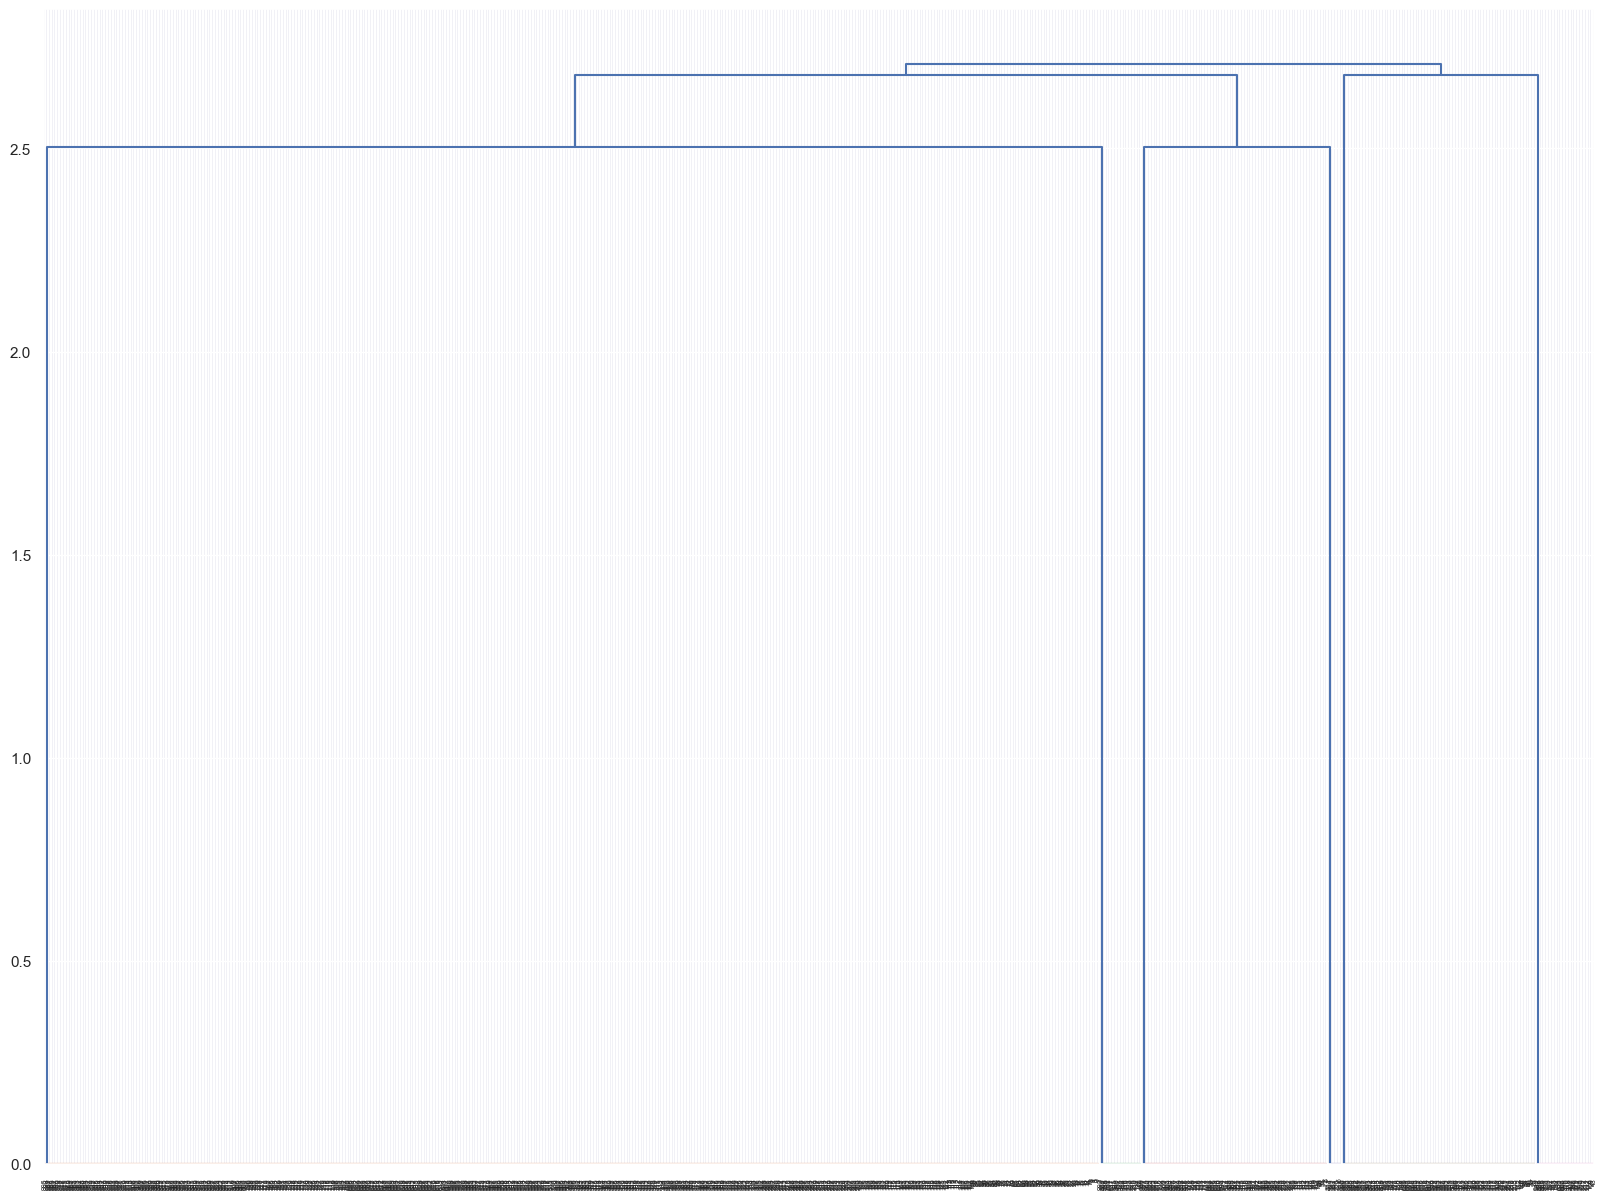

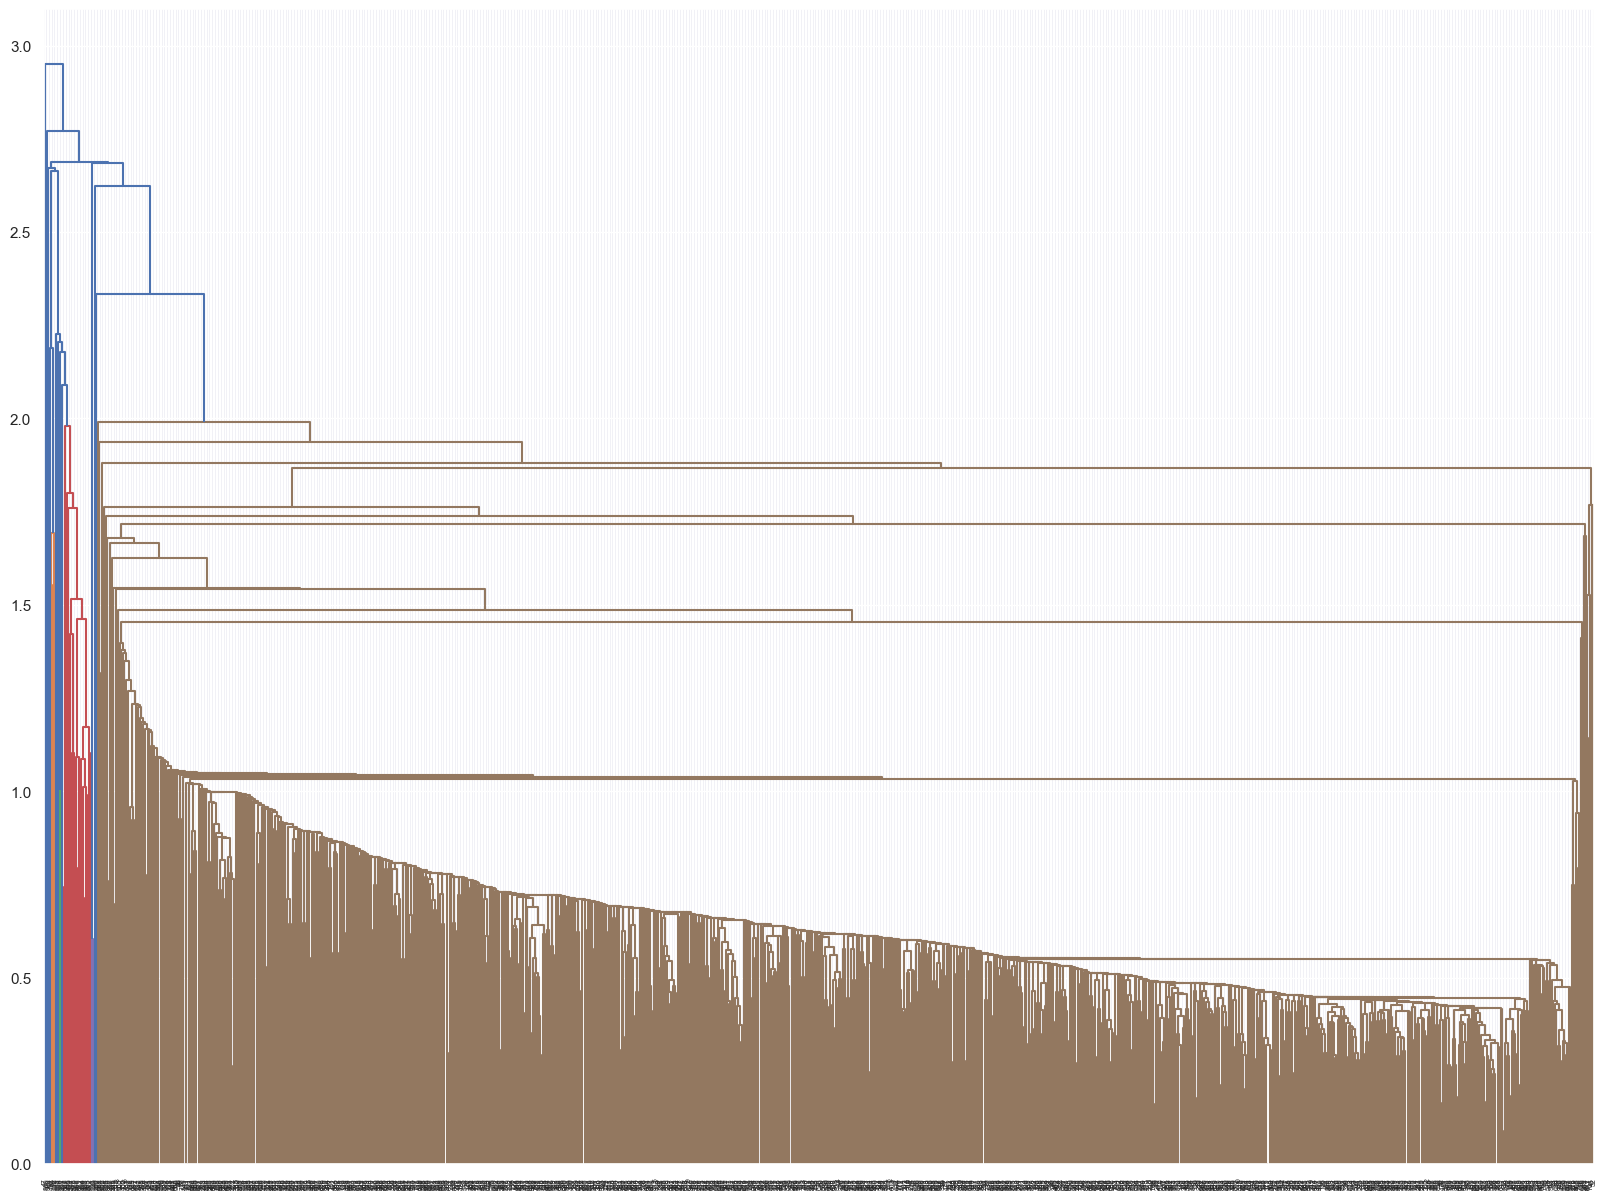

In [543]:
#Creating dendrogram from unsupervised learning on some of the previously unsued columns  
df_nm = StandardScaler().fit_transform(df_rel[['Album_type','official_video','Licensed']].head(1000))
clust = linkage(df_nm)
dendrogram(clust)
plt.show()

#Creating dendrogram from unsupervised learning on some of the previously highly used  columns 
df_nm = StandardScaler().fit_transform(features.head(1000))
clust = linkage(df_nm)
dendrogram(clust)
plt.show()

The first dendrogram seems to show that the model is highly mapped to the three features inputted and the second dendogram seems to show that the model is becoming too complex for interpretation.


Neither of the two unsupervised learning models (trained on different data) are really showing 2 clear categories like our bianry target is based off of. This supports the fact that unsupervised learning does not map well to our problem at hand

<BR>

# Conclusions 



Ultimately, this project shows that a Decision Tree Classifier model was the most accurate model for determining whether a song will proportionally  do better on Spotify or Youtube based on its musical tratis. The process of coming to such was designed by analyzing relationships between data with a correlation plot, processing and splitting data, applying and comparing the accuracies of different machine learning models (Logistic Regresionn, K-NN, Decision Tree), and mapping these resutls to a data engineered target varibble. 

However our project also highlighted a major limitation within our dataset, the features were not definitive enough to our question. Despite changing the models being used, scaling the data, or adjusting the number of features used, the accuracy never grew above 70%. 

One resolution that can be found is that the accuracy of the decision tree model was able to slighly increase when more features were being considered, making the model more complex. In the future we would look towards more complex datasets and models to try and answer this question more accurately. This assumption is backed up by the fact that these music platofroms and the behaviors of their users are very complex as well. It is even further supported by the fact that their are low correlation values from our correlation matrix, but since these values are still between 0 - 0.2, some impact is being made, just at a low scale.

Looking back on the specific results that are still interpretable, we can see that there are certain trends. For examples users who prefer acoustincness and instrumentalness are generally looking towards Spotify as their music platform, while users who are listening to songs with longer durations or songs with more danceability are using Youtube as their music platform more often.
